In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import folium
import dash
import tensorflow
import plotly
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

print('All libraries install successfully!')

All libraries install successfully!


In [2]:
file_name = '/Users/samuel/Documents/University/Masters/Modules/SEM2/Cities and Climate Change/Python/HADCRUT5/HadCRUT.5.0.2.0.analysis.summary_series.southern_hemisphere.annual.csv'

df = pd.read_csv(file_name)

print(df)

     Time  Anomaly (deg C)  Lower confidence limit (2.5%)  \
0    1850        -0.399526                      -0.634420   
1    1851        -0.247451                      -0.493319   
2    1852        -0.223096                      -0.459879   
3    1853        -0.295317                      -0.493673   
4    1854        -0.408352                      -0.580738   
..    ...              ...                            ...   
169  2019         0.638402                       0.585467   
170  2020         0.569932                       0.517750   
171  2021         0.445618                       0.392176   
172  2022         0.502809                       0.448319   
173  2023         0.786400                       0.729717   

     Upper confidence limit (97.5%)  
0                         -0.164633  
1                         -0.001582  
2                          0.013686  
3                         -0.096961  
4                         -0.235966  
..                              ...  
1

In [3]:
df.head(20)

,Time,Anomaly (deg C),Lower confidence limit (2.5%),Upper confidence limit (97.5%)
0,1850,-0.399526,-0.634420,-0.164633
1,1851,-0.247451,-0.493319,-0.001582
2,1852,-0.223096,-0.459879,0.013686
3,1853,-0.295317,-0.493673,-0.096961
4,1854,-0.408352,-0.580738,-0.235966
5,1855,-0.348259,-0.517924,-0.178594
6,1856,-0.307167,-0.477350,-0.136983
7,1857,-0.483063,-0.648875,-0.317252
8,1858,-0.418927,-0.589662,-0.248192
9,1859,-0.314747,-0.481980,-0.147513


In [4]:
df.dtypes

Time                                int64
Anomaly (deg C)                   float64
Lower confidence limit (2.5%)     float64
Upper confidence limit (97.5%)    float64
dtype: object

In [5]:
df.rename(columns={'Time': 'Year'}, inplace=True)
df.rename(columns={'Anomaly (deg C)': 'Anomaly'}, inplace=True)
df.rename(columns={'Lower confidence limit (2.5%)': 'Lower2.5'}, inplace=True)
df.rename(columns={'Upper confidence limit (97.5%)': 'Upper97.5'}, inplace=True)
df.head()

,Year,Anomaly,Lower2.5,Upper97.5
0,1850,-0.399526,-0.634420,-0.164633
1,1851,-0.247451,-0.493319,-0.001582
2,1852,-0.223096,-0.459879,0.013686
3,1853,-0.295317,-0.493673,-0.096961
4,1854,-0.408352,-0.580738,-0.235966


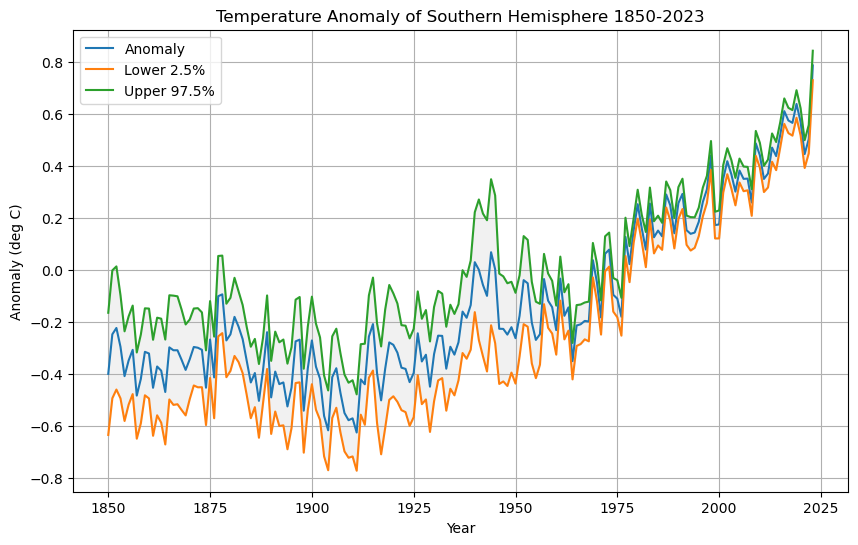

In [6]:
plt.figure(figsize=(10, 6))

line_anomaly, = plt.plot(df['Year'], df['Anomaly'], label='Anomaly')
line_lower, = plt.plot(df['Year'], df['Lower2.5'], label='Lower2.5')
line_upper, = plt.plot(df['Year'], df['Upper97.5'], label='Upper97.5')

plt.fill_between(df['Year'], df['Lower2.5'], df['Upper97.5'], color='lightgrey', alpha=0.3)

plt.title('Temperature Anomaly of Southern Hemisphere 1850-2023')
plt.xlabel('Year')
plt.ylabel('Anomaly (deg C)')

plt.legend(handles=[line_anomaly, line_lower, line_upper],
           labels=['Anomaly', 'Lower 2.5%', 'Upper 97.5%'])

plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Temperature Anomaly of Southern Hemisphere 1850-2023')

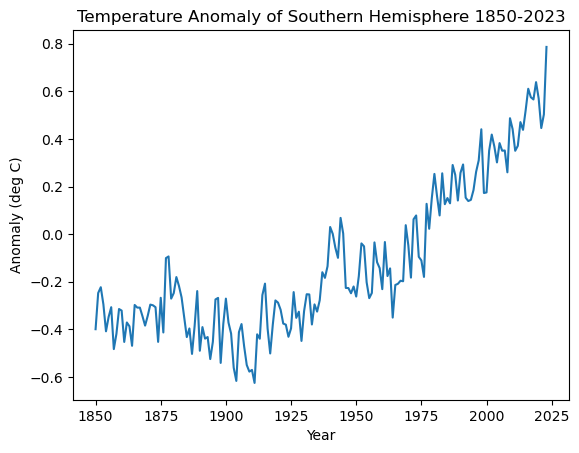

In [7]:
sns.lineplot(data=df, x='Year', y='Anomaly')
plt.xlabel('Year')
plt.ylabel('Anomaly (deg C)')
plt.title('Temperature Anomaly of Southern Hemisphere 1850-2023')

[]

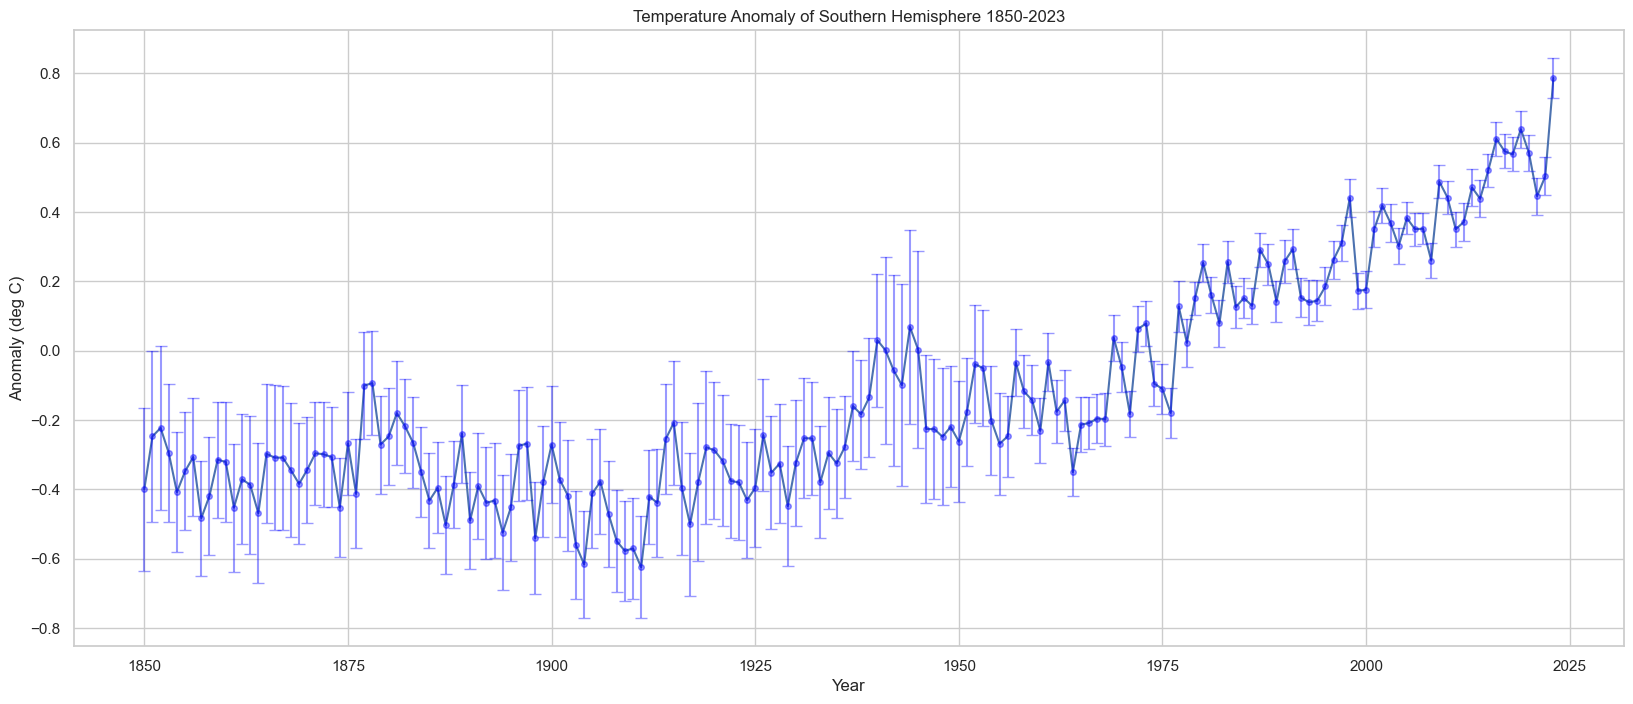

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))

sns.lineplot(x='Year', y='Anomaly', data=df, err_style="bars", errorbar=None)
plt.errorbar(df['Year'], df['Anomaly'], yerr=[df['Anomaly'] - df['Lower2.5'], df['Upper97.5'] - df['Anomaly']],
             fmt='o', color='blue', alpha=0.4, markersize=4, capsize=4)

plt.xlabel('Year')
plt.ylabel('Anomaly (deg C)')
plt.title('Temperature Anomaly of Southern Hemisphere 1850-2023')

plt.plot()